# Find similar images using CLIP embeddings

In this notebook you learn how to find similar images using the cosine similarity.

First, we'll get an understanding how the maths work using a basic example
Second, we'll calculatie the similarity between two images
Third, we'll find similar images from a set of images. 

### TO DO: Run the notebook and do the 4 exercises

### Contents
1. Intro:  calculate the cosine similarity (nl: cosinusgelijkenis)
2. Calculate cosine similarity for 2 images
3. Find similar images with cosine similarity

### Sources
- https://nl.wikipedia.org/wiki/Cosinusgelijkenis
- https://openai.com/research/clip
- https://medium.com/@jeremy-k/unlocking-openai-clip-part-2-image-similarity-bf0224ab5bb0
- https://www.geeksforgeeks.org/how-to-calculate-cosine-similarity-in-python/
- https://www.geeksforgeeks.org/python-measure-similarity-between-two-sentences-using-cosine-similarity/

## 1. Intro:  calculate the cosine similarity (nl: cosinusgelijkenis)

In [1]:
#Define two points

# Choose values [1-10] (integers/floats) to properly plot it below

# point 1 = a
p1x = 4
p1y = 3

#point 2 = b
p2x = 3
p2y = 4

In [2]:
#function to calculate cosine similarity
def cosine_similarity(a, b):
    dot_product = sum(x * y for x, y in zip(a, b))
    magnitude_a = sum(x * x for x in a) ** 0.5
    magnitude_b = sum(x * x for x in b) ** 0.5
    return dot_product / (magnitude_a * magnitude_b)

cosine_similarity((p1x,p1y), (p2x,p2y))

0.96

<IPython.core.display.Javascript object>


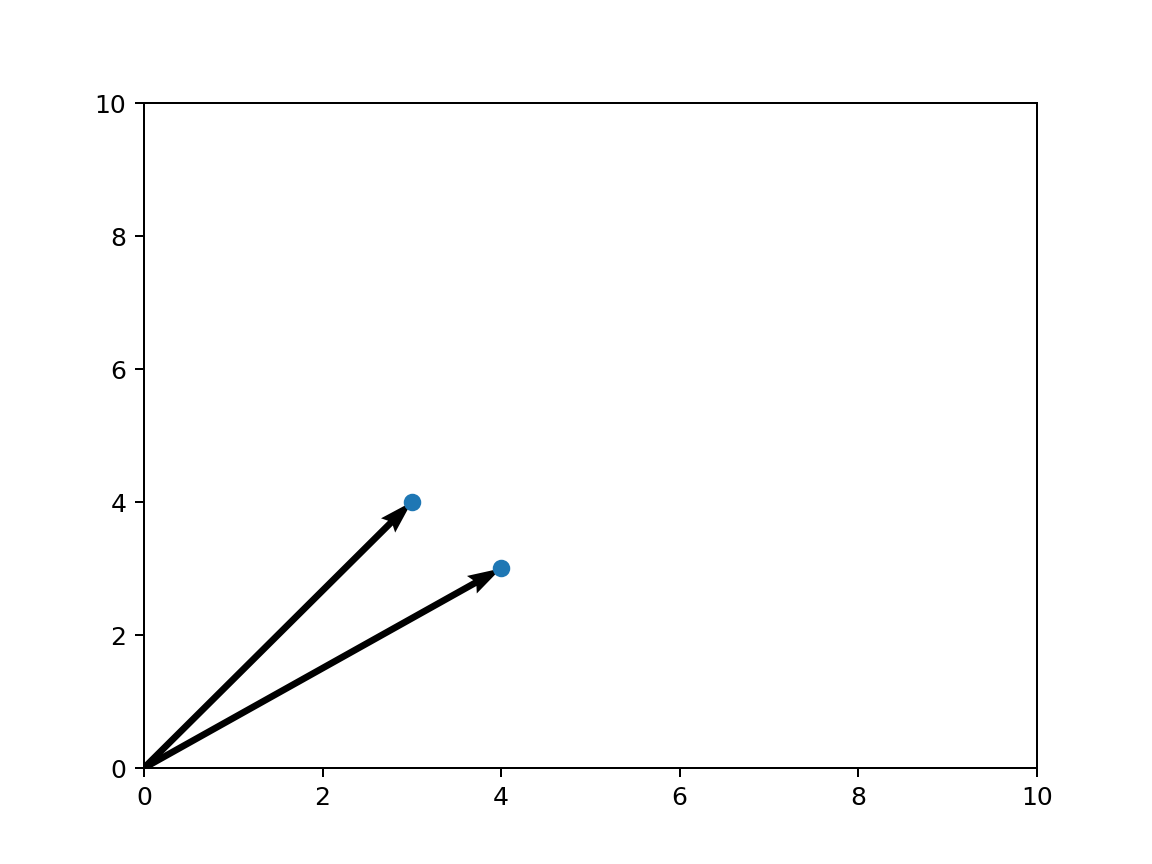

In [3]:
#plot the points and create a vector from 0,0
%matplotlib notebook
import matplotlib.pyplot as plt 

#get points and plot them
points_x = p1x, p2x
points_y = p1y, p2y
plt.plot(points_x, points_y, 'o') 

#plot vectors 
plt.quiver([0, 0], [0, 0], [p1x, p2x], [p1y,p2y], angles='xy', scale_units='xy', scale=1)

#plot axes and show it
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

### Exercise 1: 
1. play with the points and see what happens
2. create two examples:
    - Where cosine similarity is 1
    - Where cosine similarity is 0

In [ ]:
#YOUR CODE HERE

## 2. Calculate cosine similarity for 2 images

In [4]:
# first install packages! Uncomment if necessary
#pip install torch torchvision
#pip install git+https://github.com/openai/CLIP.git

Here we will use two images and calculate how similar they are. 

To do so we'll create embeddings using CLIP. CLIP as several methods of creating embeddings, but here we'll use a standard Vision Transformer (ViT).

TO DO: download the images from DLO to your folder.

In [5]:
# import packages
from PIL import Image
import torch
import torch.nn as nn
import clip

#check device
device = "cuda" if torch.cuda.is_available() else "cpu"

#select embedding model
model, preprocess = clip.load("ViT-B/32", device=device)

In [14]:
print(dir(clip))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'available_models', 'clip', 'load', 'model', 'simple_tokenizer', 'tokenize']


In [15]:
models = clip.available_models()
models

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [16]:
#select the two images you've download 
image1 = "car512.png"
image2= "car256.png"

In [28]:
#create embeddings for the images
image1_preprocess = preprocess(Image.open(image1)).unsqueeze(0).to(device)
image1_features = model.encode_image( image1_preprocess)

image2_preprocess = preprocess(Image.open(image2)).unsqueeze(0).to(device)
image2_features = model.encode_image( image2_preprocess)

In [31]:
print(image1_features.shape)
print(type(image1_features))
print(image1_features.ndim)

torch.Size([1, 512])
<class 'torch.Tensor'>
2


In [37]:
data = image1_features.detach().cpu().numpy()
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(1, 512)


In [38]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Function to perform t-SNE on a PyTorch tensor
def tsne_reduction(tensor, n_components=2):
    """
    Apply t-SNE reduction on a PyTorch tensor.

    :param tensor: PyTorch tensor to be reduced.
    :param n_components: Target number of dimensions.
    :return: t-SNE reduced data.
    """
    # Convert the tensor to a numpy array
    data = tensor.detach().cpu().numpy()

    # Apply t-SNE
    tsne = TSNE(n_components=3)
    reduced_data = tsne.fit_transform(data)
    return reduced_data

# Example PyTorch tensor
tensor = torch.randn(1, 512)

# Perform t-SNE reduction
reduced_data = tsne_reduction(image1_features)

# Plotting (Note: This might not be meaningful for a single data point)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title("t-SNE of a Single Tensor")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


ValueError: perplexity must be less than n_samples

In [ ]:
import clip
import torch
from PIL import Image

def generate_embedding(image_path):
    # Load the model
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load("ViT-B/32", device=device)

    # Load and preprocess the image
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

    # Generate the embedding
    with torch.no_grad():
        image_features = model.encode_image(image)

    # Normalize the features to compare similarity
    image_features /= image_features.norm(dim=-1, keepdim=True)
    return image_features.cpu().numpy()

if __name__ == "__main__":
    image_path = 'path_to_your_image.jpg'  # Replace with your image path
    embedding = generate_embedding(image_path)
    print("Embedding shape:", embedding.shape)
    print("Embedding data:", embedding)


### Exercise 2

Inspect the embeddings your created. 
Print it, the number of dimensions and the datatype

In [8]:
#YOUR CODE HERE

In [18]:
#calculate the cosine similarity
cos = torch.nn.CosineSimilarity(dim=0)

similarity = cos(image1_features[0],image2_features[0]).item()
similarity = (similarity+1)/2

print("Image similarity: ", similarity)

Image similarity:  0.9919959902763367


## Find similar images with cosine similarity

In [18]:
! cd elephants && ls

160210183625-01-wild-elephant-0210-super-169.jpg
5038805076_d33dbbd3dd.jpg
7825284102_41d467d9f5_b.jpg
African-Elephant2.jpg
African_Elephant_(Loxodonta_africana)_bull_(31100819046).jpg
Big-Elephant-Full-HD-Wallpapers-1024x731.jpg
Elephant - 5.jpg
Elephant hd pictuer.jpg
Elephant-Low-Res-2.jpg
Elephant-Pictures-2012 05.jpg
Elephant.jpg
Elephant.jpgA68827D6-3281-4CBF-B93C-6853EB41F50DOriginal.jpg
Elephant_Loxodonta_Africana_04.jpg
Elephant_Sri_Lanka.jpg
Hdhut.blogspot.com (12).jpg
Hdhut.blogspot.com (13).jpg
Hdhut.blogspot.com (9).jpg
a-elephant_img01-l.jpg
africa_kenya_samburu_masai_mara_gallery_ele.jpg
african-bush-elephant.jpg
animal-rights-group-says-bronx-elephant-should-have-human-rights-too.jpg
asian-elephant-1.jpg
baby.jpg
beautiful-dawn-dusk-1054655.jpg
cute-baby-elephant-9.jpg
elephant indian.jpg
elephant pics (10).jpg
elephant-2_1941432a.jpg
elephant-3.jpg
elephant-706489.jpg
elephant-india-indian-e1507548565217.jpg
elephant-memory-orig.jpg
elephant1.wdp.jxr
elephantGE1-58c54

In [19]:
import torch
import clip
from PIL import Image
import os
import itertools
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

print(device)

dataset_folder = './elephants/'

images = []
for root, dirs, files in os.walk(dataset_folder):
    for file in files:
        if file.endswith(('jpg','jpeg')):
            images.append(  root  + '/'+ file)


#Embedding of the input image
original_image = './elephants/Elephant.jpg'
input_image = preprocess(Image.open(original_image)).unsqueeze(0).to(device) #
input_image_features = model.encode_image(input_image)

result = {}
for img in images:
    with torch.no_grad():
        image_preprocess = preprocess(Image.open(img)).unsqueeze(0).to(device)
        image_features = model.encode_image( image_preprocess)
        cos = torch.nn.CosineSimilarity(dim=0)
        sim = cos(image_features[0],input_image_features[0]).item()
        sim = (sim+1)/2
        result[img]=sim


sorted_value = sorted(result.items(), key=lambda x:x[1], reverse=True)
sorted_res = dict(sorted_value)

top_3 = dict(itertools.islice(sorted_res.items(), 3))

print(top_3)

cpu
{'./elephants//Elephant.jpg': 1.0, './elephants//elephant_3050699a-xlarge.jpg': 0.9717911779880524, './elephants//maxresdefault4.jpg': 0.9711835980415344}


The original image is:


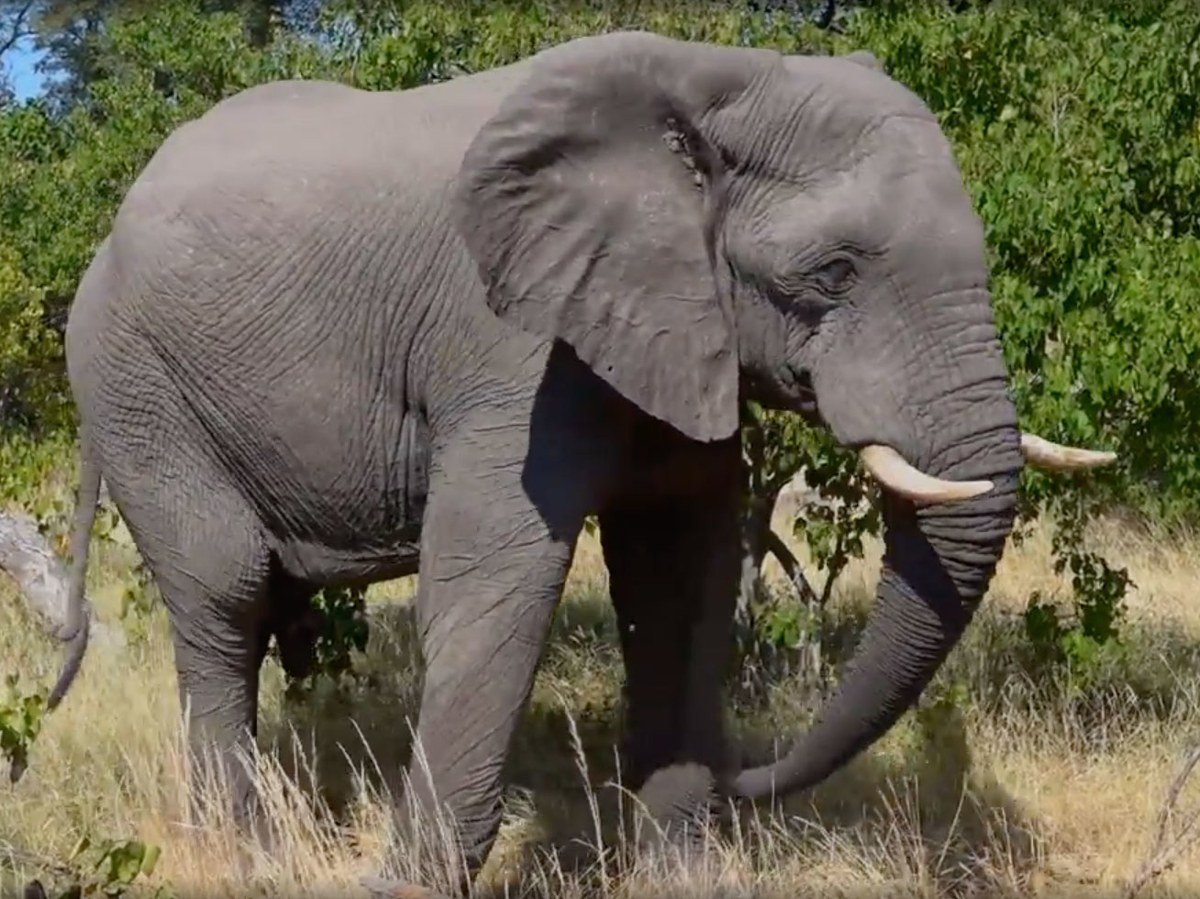

The duplicate is: 


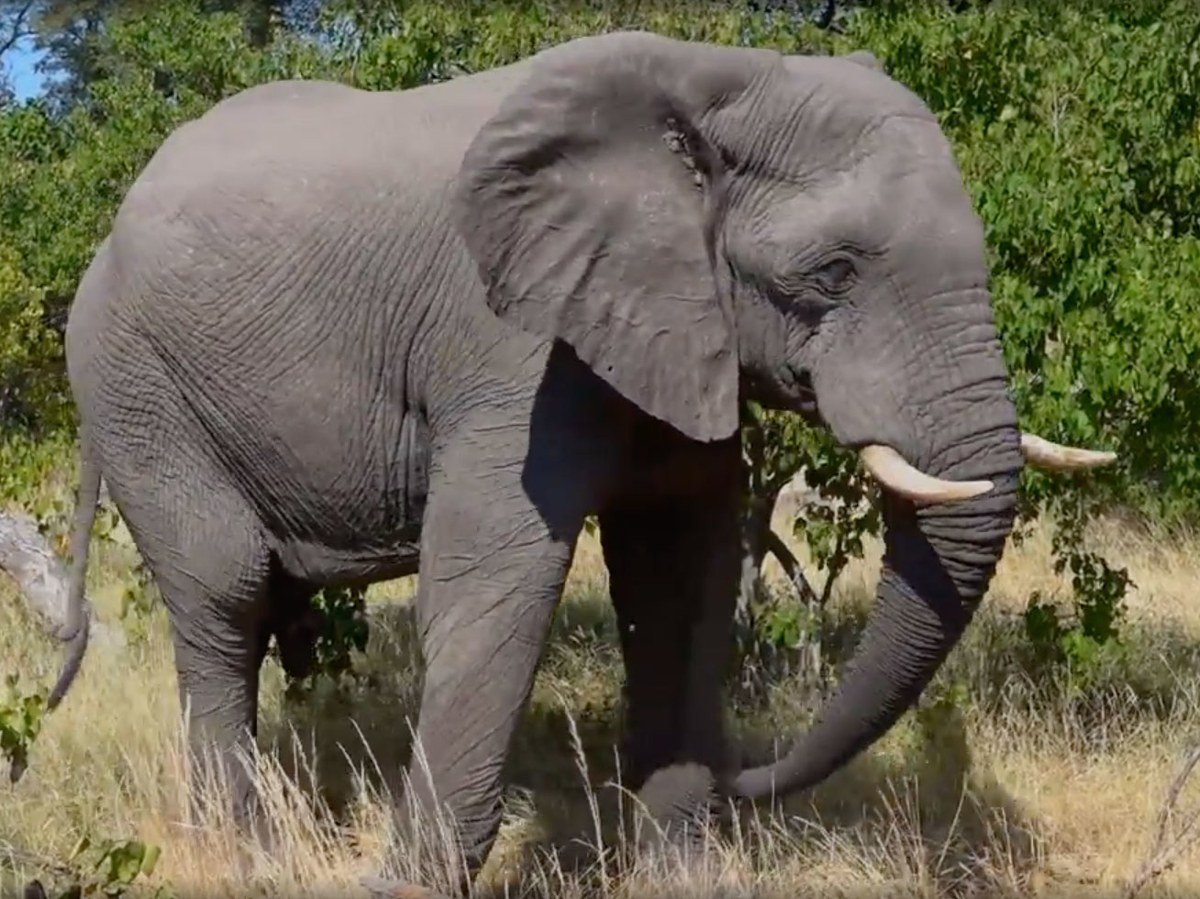

And the most similar images are:


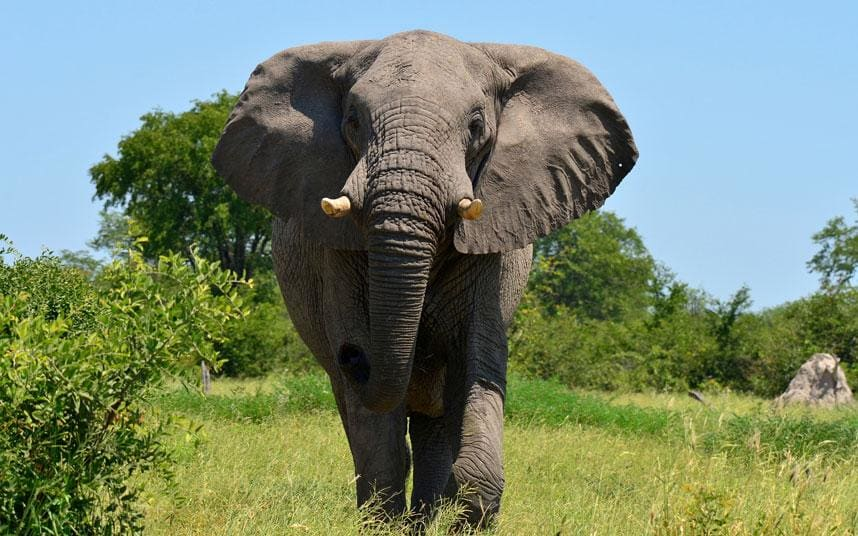

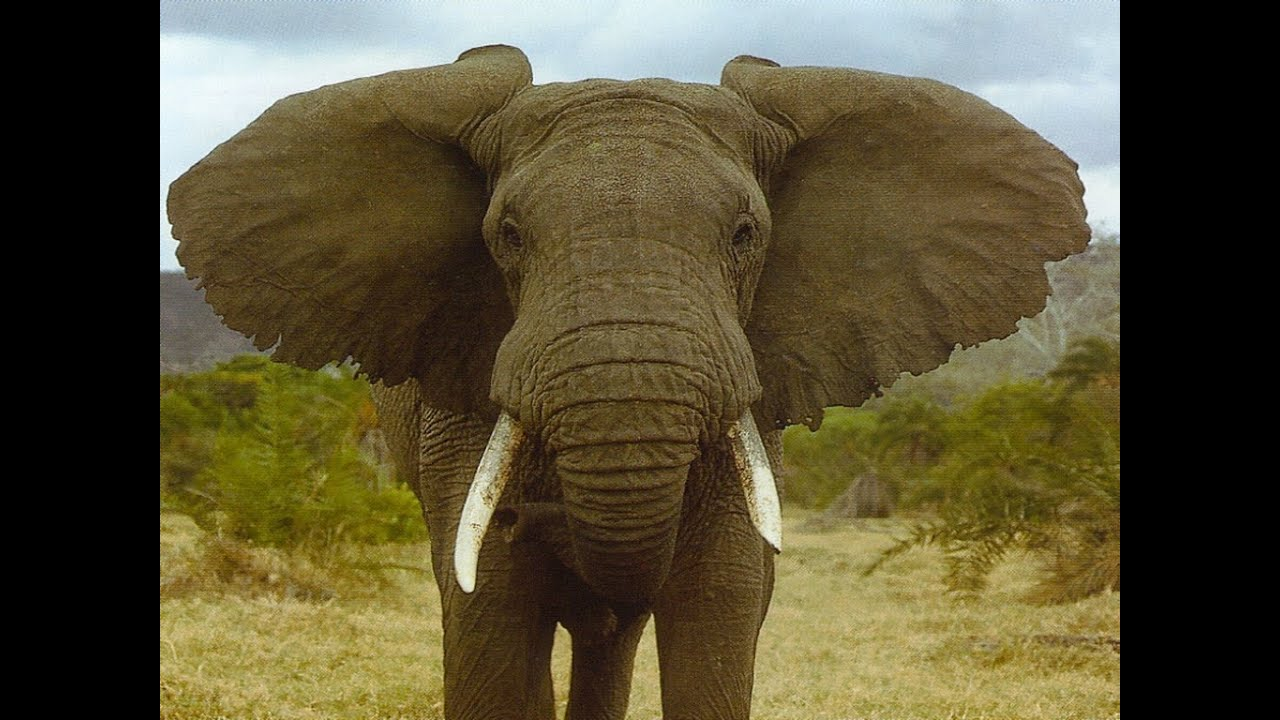

In [20]:
#display most similar images
from IPython.display import Image
from IPython.display import display

original_image = original_image
first = list(top_3.keys())[0]
second = list(top_3.keys())[1]
third = list(top_3.keys())[2]

#original image
img0 = Image(original_image, width = 400) 

#top 3
img1 = Image(first, width = 400) 
img2 = Image(second, width = 400) 
img3 = Image(third, width = 400)

print("The original image is:")
display(img0)
print('The duplicate is: ')
display(img1)
print('And the most similar images are:')
display(img2, img3)

### Exercise 3
Get the image that is least similar to the original image. 

./elephants//cute-baby-elephant-9.jpg


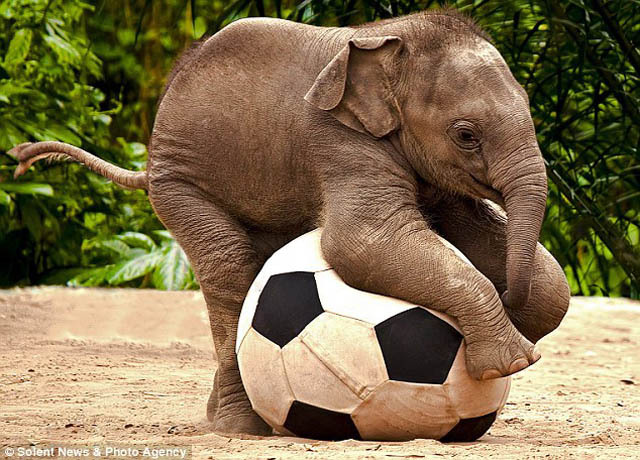

In [28]:
# YOUR CODE HERE
print(list(sorted_res)[-1])
Image(list(sorted_res)[-1])

### Exercise 4

Now do the same for the images you just created with the data augmentation Notebook!

Copy the code from above in the cells below and 

In [ ]:
# YOUR CODE HERE